# Predict house prices using Linear Regression

In this module, you will assume the role of a data scientist at AnyData company. You are tasked with performing exploratory data analysis and creating a model that can predict house prices based on one or more features. You will download the dataset, perform analysis, and then copy the results to a private Amazon S3 bucket. You will use Python Jupyter notebooks and common Python libraries such as Pandas, Matplotlib and Sklearn.

This notebook contains the full working version of task. If you prefer to step through each task, please use the `housing-linear-start-here.ipynb` notebook which contains empty code-cells where you can enter comments generate Amazon CodeWhisperer code recommendations.

## Data Import and Exploration

The dataset we will use is a .csv file which describes houses sold in the North East region of the United States in 2022-2023. It contains the selling price along with house features such as the number of bedrooms, bathrooms, sq. ft. and so on. The dataset is available from the Amazon CodeWhisperer Immersion day repository under the MIT license.

### Download and import the dataset

1. To get started, we will import the pandas and matplotlib python libraries in the first code cell. We will work with these libraries throughout the lab.

In [8]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

2. Let's print out the version of the pandas library we are running. This is useful if you are extending this use-case with specific version dependencies.

In [9]:
# Print pandas version
print(pd.__version__)

1.4.4


3. Load the `housing-data.csv` data-set into a pandas data-frame and print it.

In [11]:
# Load the housing-data.csv to a pandas dataframe called housing_df and print it
housing_df = pd.read_csv('housing-data.csv')
print(housing_df)


    Bed  Bath  sq. ft.  lot_size    Price         Type
0     6   3.5     2606      0.42  2050000        House
1     2   1.0     1095      0.14   750000        Condo
2     4   6.5     5220      0.69  2270000  Multifamily
3     3   2.5     1541      0.06   500000     Townhome
4     3   2.5     1851      0.06   434000     Townhome
5     5   3.0     3316      0.86  1448000        House
6     3   3.5     4336      0.10  1772000        House
7     2   1.5     1120       NaN   468000        Condo
8     4   3.5     3538      0.08  1092000     Townhome
9     3   2.5     1922      0.12   837000     Townhome
10    4   2.5     2309      0.19   952000     Townhome
11    6   4.5     3813      0.09  1951000        House
12    4   3.5     2512      2.46  1453000     Townhome
13    3   2.5     1676      0.45   887000        Condo
14    2   2.0     1258       NaN   361000        Condo
15    3   2.5     2228       NaN   644000        Condo
16    2   2.0     1277       NaN   354000        Condo
17    3   

### Explore the dataset

In this subsection, we will review some basic information about the dataset.

1. Let's review more information on each column or feature.

In [13]:
# print information about this dataframe and describe the dataset
print(housing_df.info())
print(housing_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bed       30 non-null     int64  
 1   Bath      30 non-null     float64
 2   sq. ft.   30 non-null     int64  
 3   lot_size  22 non-null     float64
 4   Price     30 non-null     int64  
 5   Type      30 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.5+ KB
None
             Bed       Bath      sq. ft.   lot_size         Price
count  30.000000  30.000000    30.000000  22.000000  3.000000e+01
mean    3.266667   2.850000  2341.900000   0.526364  9.433040e+05
std     1.201532   1.075992  1122.910699   0.737193  5.340711e+05
min     1.000000   1.000000   423.000000   0.050000  3.540000e+05
25%     2.250000   2.500000  1644.000000   0.080000  5.080000e+05
50%     3.000000   2.500000  2077.000000   0.140000  8.145005e+05
75%     4.000000   3.500000  3087.500000   0.630000  1.19

In the previous output you will notice that there are 5 columns with a mix of data types. In addition, note that at least one of the columns have some null values based on the `Non-Null Count` field. From the output of the `describe` function, we can view some statistical information on columns with numerical values.

In this section we started our house prices prediction lab by downloading the dataset and examining it.  We used Amazon CodeWhisperer code suggestions to help with these tasks. In the next section we will clean up, transform and visualize the data for more analysis.

## Data Transformation and Visualization

Cleaning up data is part of nearly every data science project. In the previous section you may have noticed some null or missing values within certain rows. In this section we will remove rows with missing values, then visualize the data. We will then convert a categorical column into numerical values. As before, Amazon CodeWhisperer can help us perform these tasks quickly.

### Cleaning up data

1. Drop any rows that contain null values from the existing data frame. 

In [14]:
# Drop dataframe rows with null values
housing_df = housing_df.dropna()

2. Next using CodeWhisperer, we will drop the `lot_size` column. While this feature may influence house prices, we will exclude it from our analysis for now.

In [15]:
# Drop the 'lot_size' column 
housing_df = housing_df.drop(columns=['lot_size'])

3. Print information about the dataframe again along with the first 5 rows. 

In [16]:
# Print information about the dataframe and show the first 5 rows
print(housing_df.info())
print(housing_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bed      22 non-null     int64  
 1   Bath     22 non-null     float64
 2   sq. ft.  22 non-null     int64  
 3   Price    22 non-null     int64  
 4   Type     22 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ KB
None
   Bed  Bath  sq. ft.    Price         Type
0    6   3.5     2606  2050000        House
1    2   1.0     1095   750000        Condo
2    4   6.5     5220  2270000  Multifamily
3    3   2.5     1541   500000     Townhome
4    3   2.5     1851   434000     Townhome


Notice that the `Non-Null Count` is consistent for each column and that the lot size column is no longer present.

4. Let's use one hot encoding to convert the `Type` column from categorical to numerical data. Print the first few rows again to review the new columns added by this operation.

In [17]:
#Use one hot encoding to convert Type column and show the first few rows
housing_df = pd.get_dummies(housing_df, columns=['Type'])
housing_df.head()

,Bed,Bath,sq. ft.,Price,Type_Condo,Type_Farm,Type_House,Type_Multifamily,Type_Townhome
0,6,3.5,2606,2050000,False,False,True,False,False
1,2,1.0,1095,750000,True,False,False,False,False
2,4,6.5,5220,2270000,False,False,False,True,False
3,3,2.5,1541,500000,False,False,False,False,True
4,3,2.5,1851,434000,False,False,False,False,True


### Visualizing the data

In this sub-section we will use a scatter plot to visualize the data. We will use house price as our dependent variable and sq. ft. for independent variable. 

1. Set x and y variables as house sq. ft. and Price respectively

In [18]:
# Get x values from the 'sq. ft.' column
x = housing_df["sq. ft."]

# Get y values from the Price column
y = housing_df["Price"]

2. Next, label the x and y axis and show the scatter plot

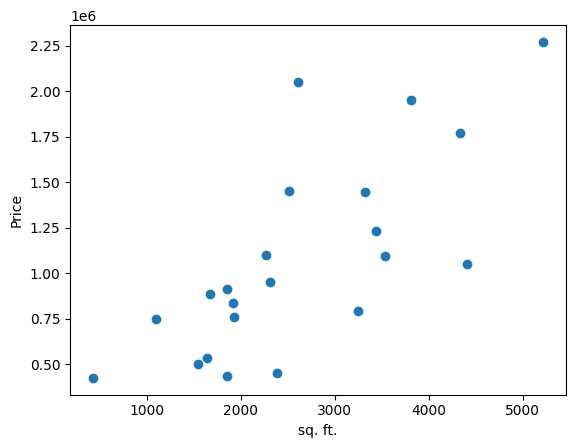

In [19]:
# plot the x and y values
plt.scatter(x, y)

# Label the x and y axes and show the plot
plt.xlabel('sq. ft.')
plt.ylabel('Price')
plt.show()


In this section we cleaned up the data, performed transformations and plotted house price against sq. ft. Notice that the scatter plot shows a correlation of increasing house prices with sq. ft. In the next section we will use linear regression to describe this relationship.

## Model Inference

In this section we will create a linear regression model to predict house prices based on the square foot area. Since the only dependent variable is the square footage, this is an example of single variable linear regression. 

You may extend the example to perform multi-variable regression by incorporating other features such as the number of rooms, or the Type feature where we performed one-hot encoding. This task is left up to the reader. Hint: use Amazon CodeWhisperer to help you.

### Create model and fit to data

We will use the Python sklearn library to create the model. There are three steps: import the library, create the model, and fit model to training data. 


1. Run the next code cell which will create a function that will return a linear regression model given a dataset.

In [20]:
# import the LinearRegression class from the sklearn library
from sklearn.linear_model import LinearRegression

'''
Define a function to create the linear regression model
This function accepts two arguments: x and y. Reshape the x values to (-1,1)
Fit the model to the x and y values
Return the model
'''

def fit_linear_regression(x, y):
    # reshape the x values to (-1,1)
    x = x.values.reshape((-1,1))
    # create the model
    model = LinearRegression()
    # fit the model to the x and y values
    model.fit(x, y)
    # return the model
    return model

We can use the `fit_linear_regression` function to create a linear regression model on different data sets. The function does the following.
- Creates an instance of the LinearRegression algorithm from the sklearn library
- Fit the model with the x and y values we prepared in the data transformation section

2. Call the `fit_linear_regression` function using the dataset we created earlier. This will return a linear regression model that is fitted to our housing dataset. 

In [21]:
# create model by calling the fit_linear_regression function with previous x and y values
model = fit_linear_regression(x, y)

### Examine the regression line

After the model is created, we can plot the original data set along with the regression line. The regression line is also called the line of best fit and includes an intercept and a slope.

1. Print out the intercept and slope values of the regression line.

In [22]:
# get the linear regression line slope and intercept and print it
slope = model.coef_
intercept = model.intercept_
print(f"Slope: {slope}\nIntercept: {intercept}")


Slope: [338.03674346]
Intercept: 194144.66899730533


2. We will use Amazon CodeWhisperer to print a scatter plot of the original `x` and `y` values along with the regression line

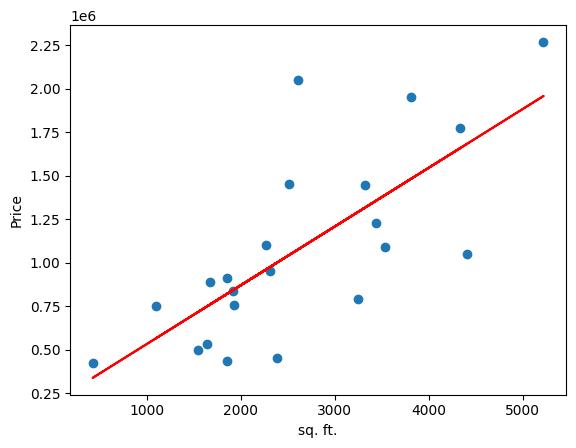

In [23]:
# Plot the original x and y values, and the regression line
plt.scatter(x, y)
plt.plot(x, slope * x + intercept, color='red')
plt.xlabel('sq. ft.')
plt.ylabel('Price')
plt.show()

### Predict house price

Now we can predict the price of a house using the regression line. 

1. Predict the price of a house of 5000 sq. ft. and print it. Optionally, test predicting the price of houses with different square footage values.

In [24]:
# Get the predicted home price from the model for a house with 5000 sq. ft and print it
predicted_home_price = model.predict([[5000]])
print(predicted_home_price)

[1884328.38629366]


2. Try predicting some more home prices based on sq. ft. 

In [25]:
# Predict the home price for houses with different sq. ft.
predicted_home_price = model.predict([[1000]])
print(predicted_home_price)

[532181.41245658]


Congratulations! You have completed this data science lab on linear regression. In this lab we built a house price prediction model with the help of Amazon CodeWhisperer:
- Load a house prices dataset and examine it
- Clean up the data and transform it
- Plot the relationship between dependent and independent variables
- Create a linear regression model by fitting to training data
- Predict house prices based on the model

If you are feeling inspired, we suggest the following additional ways to extend this example. Use Amazon CodeWhisperer to help you code.
1. Use different housing data sets. You may use a public dataset source such as [Kaggle](https://kaggle.com)
1. Use multiple variables to predict house prices - try out the optional module where you'll leverage regression using mutiple features


## Regression using multiple features

This is an optional module where we'll explore using multiple features for regression. We'll use the [sklearn Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) to predict house prices based on all the features in the dataset.

## Split data and shuffle

In [46]:
# Import ensemble
import sklearn.ensemble as ensemble

# Assign dependent and independent variables

x = housing_df.drop('Price', axis=1)
y = housing_df['Price']

Mean squared error train 248042.75062788706
Mean squared error test 359629.3394033095
['Bed', 'Bath', 'sq. ft.', 'Type_Condo', 'Type_Farm', 'Type_House', 'Type_Multifamily', 'Type_Townhome']
[658229.40817519]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Split data for training

In [ ]:
# Split data into training and test sets and shuffle
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

## Setup model and fit to data

In [ ]:
# Setup model
regressor_model = ensemble.GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=50,
    min_samples_split=4,
    min_samples_leaf=6,
    max_features=0.6,
    loss='huber'
)



## Fit the model to the training data

In [ ]:
# Fit model on training data
regressor_model.fit(x_train, y_train)

## Check model accuracy

In [ ]:
# check model accuracy against training data using mean absolute error
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_train, regressor_model.predict(x_train))
print("Mean absolute error train", error)

# check model accuracy against test data using mean absolute error
error = mean_absolute_error(y_test, regressor_model.predict(x_test))
print("Mean absolute error test", error)

## Generate features from dataset

In [47]:
# Generate list of features from dataframe columns and remove Price column
features = housing_df.columns.tolist()
features.remove('Price')
print(features)




['Bed', 'Bath', 'sq. ft.', 'Type_Condo', 'Type_Farm', 'Type_House', 'Type_Multifamily', 'Type_Townhome']
[658229.40817519]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Predict price based on multiple features

In [ ]:
# predict price house price based on features and print price
house_features = [ 3, 3, 3000, 0, 0, 1, 0, 0 ]
price = regressor_model.predict([house_features])
print(price)